<a href="https://colab.research.google.com/github/karthik0967/Image-Classification/blob/main/Mini_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from skimage.io import imread
from skimage.transform import resize
import os

In [2]:
target = []
images = []
flat_data = []

In [3]:
DATADIR = './Image Data'

CATEGORIES = ['car','jet fighter']

for i in CATEGORIES:
  class_target = CATEGORIES.index(i) 
  path = os.path.join(DATADIR,i)
  for img in os.listdir(path):
    img_array = imread(os.path.join(path,img))
    img_resized = resize(img_array,(150,150,3)) 
    flat_data.append(img_resized.flatten())
    images.append(img_resized)
    target.append(class_target)


flat_data = np.array(flat_data)
target = np.array(target)
images = np.array(images)

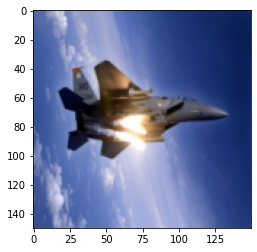

In [4]:
plt.imshow(images[33])

In [5]:
target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

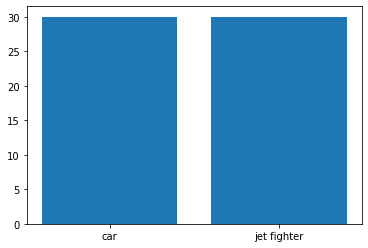

In [6]:
j,count = np.unique(target,return_counts=True)
plt.bar(CATEGORIES,count);

In [7]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(flat_data,target,random_state=71,test_size=0.3)

In [8]:
from sklearn import svm
from sklearn.model_selection import GridSearchCV
parameters = [{'C': [1,10,100,1000], 'kernel': ['linear']},
              {'C': [1,10,100,1000], 'kernel': ['rbf'], 'gamma': [0.1,0.001,0.0001]}]
svc = svm.SVC(probability = True)
grid_search = GridSearchCV(estimator=svc, param_grid=parameters)
grid_search.fit(x_train, y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=True, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid=[{'C': [1, 10, 100, 1000], 'kernel': ['linear']},
                         {'C': [1, 10, 100, 1000],
                          'gamma': [0.1, 0.001, 0.0001], 'kernel': ['rbf']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [9]:
y_pred = grid_search.predict(x_test)
y_pred

array([0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0])

In [10]:
y_test

array([0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0])

In [11]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
print("Accuracy :",round(accuracy_score(y_pred,y_test)*100,2),"%")

Accuracy : 94.44 %


In [12]:
confusion_matrix(y_pred,y_test)

array([[10,  0],
       [ 1,  7]])

In [41]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.91      1.00      0.95        10
           1       1.00      0.88      0.93         8

    accuracy                           0.94        18
   macro avg       0.95      0.94      0.94        18
weighted avg       0.95      0.94      0.94        18



Enter URL of Image to classify : https://image.cnbcfm.com/api/v1/image/101669400-12795614153_dfc68d6c52_o.jpg?v=1500062421
(982, 1500, 3)
Predicted output: jet fighter


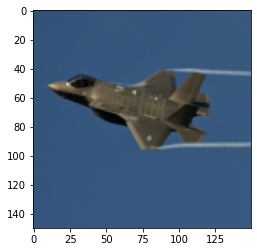

In [50]:
# Testing new Image
flat_data = []
url = input("Enter URL of Image to classify : ")

img = imread(url)
img_resized = resize(img,(150,150,3))
flat_data.append(img_resized.flatten())
flat_data = np.array(flat_data)
print(img.shape)
plt.imshow(img_resized)
y_out = grid_search.predict(flat_data)
y_out = CATEGORIES[y_out[0]]
print(f'Predicted output: {y_out}')